In [ ]:
!pip install pycryptodome


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00


Message encoded successfully.


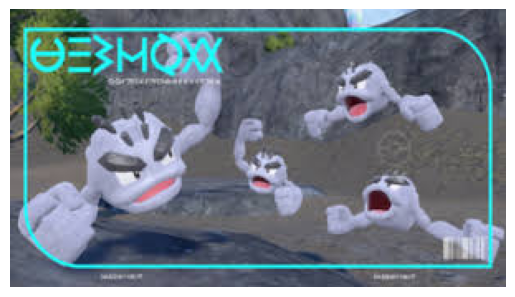

Encrypted message: K1RcPH5ourSo66/17/eiwwyhRQnwPONhfbQZpVmfTLg=
Decrypted message: Hello, How are you


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# Function to encode the message into the image using steganography
def encode_image(image_path, message, output_path):
    img = Image.open(image_path)
    pixels = img.getdata()
    message += "$"

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    data_index = 0

    encoded_pixels = []
    for pixel in pixels:
        if data_index < len(binary_message):
            encoded_pixel = list(pixel)
            for i in range(3):
                if data_index < len(binary_message):
                    encoded_pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_pixels.append(tuple(encoded_pixel))
        else:
            encoded_pixels.append(pixel)

    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(encoded_pixels)
    encoded_img.save(output_path)
    print("Message encoded successfully.")
    return output_path

# Function to decode the message from the encoded image
def decode_image_from_uploaded_file(uploaded_image):
    encoded_img = Image.open(uploaded_image)
    pixels = encoded_img.getdata()

    binary_message = ''
    for pixel in pixels:
        for i in range(3):  # Iterate over RGB channels
            binary_message += str(pixel[i] & 1)

    message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte and byte != '00000000':  # Check for the delimiter and padding
            message += chr(int(byte, 2))
        elif byte == '00000000':
            break

    print("Decoded message:", message)
    return message

# Function to display the encoded image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

# AES encryption function
def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode(), AES.block_size))
    return base64.b64encode(ciphertext).decode()

# AES decryption function
def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = unpad(cipher.decrypt(base64.b64decode(ciphertext)), AES.block_size).decode()
    return decrypted_message

# Generate a random AES key
aes_key = get_random_bytes(16)

# Image paths and message
image_path = "/content/sample for crypto.jpeg"
message_to_encrypt = "Hello, How are you"
encoded_image_path = "encoded_image.png"

# Encode the message into the image
encoded_image_path = encode_image(image_path, message_to_encrypt, encoded_image_path)

# Display the encoded image
display_image(encoded_image_path)

# Encrypt the message using AES
encrypted_message = aes_encrypt(message_to_encrypt, aes_key)
print("Encrypted message:", encrypted_message)

# Decrypt the message using AES
decrypted_message = aes_decrypt(encrypted_message, aes_key)
print("Decrypted message:", decrypted_message)


In [ ]:
!pip install cryptosteganography


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of stegano to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 29.2 MB/s eta 0:00

Message encoded successfully.


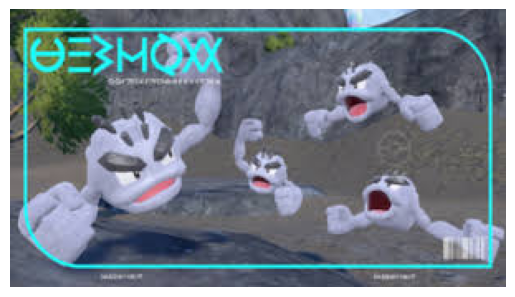

Encrypted message: MIKpvmyq84Mw9Bg33mlVh1k388SKwb2DaYvp/JL+hnM=
Decrypted message: Hello, How are you
Encryption time: 0.03227877616882324 seconds
Decryption time: 0.0029473304748535156 seconds
Encryption time: 0.016300678253173828 seconds
Decryption time: 0.002583742141723633 seconds
Payload capacity reached at 0 bytes
Decryption succeeded with incorrect password, which is not expected.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import time
from cryptosteganography import CryptoSteganography

# Function to encode the message into the image using steganography
def encode_image(image_path, message, output_path):
    img = Image.open(image_path)
    pixels = img.getdata()
    message += "$"

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    data_index = 0

    encoded_pixels = []
    for pixel in pixels:
        if data_index < len(binary_message):
            encoded_pixel = list(pixel)
            for i in range(3):
                if data_index < len(binary_message):
                    encoded_pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_pixels.append(tuple(encoded_pixel))
        else:
            encoded_pixels.append(pixel)

    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(encoded_pixels)
    encoded_img.save(output_path)
    print("Message encoded successfully.")
    return output_path

# Function to decode the message from the encoded image
def decode_image_from_uploaded_file(uploaded_image):
    encoded_img = Image.open(uploaded_image)
    pixels = encoded_img.getdata()

    binary_message = ''
    for pixel in pixels:
        for i in range(3):  # Iterate over RGB channels
            binary_message += str(pixel[i] & 1)

    message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte and byte != '00000000':  # Check for the delimiter and padding
            message += chr(int(byte, 2))
        elif byte == '00000000':
            break

    print("Decoded message:", message)
    return message

# Function to display the encoded image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

# AES encryption function
def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode(), AES.block_size))
    return base64.b64encode(ciphertext).decode()

# AES decryption function
def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = unpad(cipher.decrypt(base64.b64decode(ciphertext)), AES.block_size).decode()
    return decrypted_message

# Function to measure encryption time
def measure_encryption_time(input_image, output_image, message, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    crypto_steganography.hide(input_image, output_image, message)
    end_time = time.time()
    print(f"Encryption time: {end_time - start_time} seconds")

# Function to measure decryption time
def measure_decryption_time(output_image, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    decrypted_message = crypto_steganography.retrieve(output_image)
    end_time = time.time()
    print(f"Decryption time: {end_time - start_time} seconds")
    return decrypted_message

# Function to test payload capacity
def test_payload_capacity(input_image, output_image, password):
    crypto_steganography = CryptoSteganography(password)
    payload_size = 0
    while True:
        try:
            message = b'A' * payload_size # Example message
            measure_encryption_time(input_image, output_image, message, password)
            decrypted_message = measure_decryption_time(output_image, password)
            if decrypted_message != message:
                print(f"Payload capacity reached at {payload_size} bytes")
                break
            payload_size += 1024 # Increase payload size by 1KB
        except Exception as e:
            print(f"Error at payload size {payload_size}: {e}")
            break

# Function to test robustness
def test_robustness(output_image, incorrect_password):
    crypto_steganography = CryptoSteganography(incorrect_password)
    try:
        decrypted_message = crypto_steganography.retrieve(output_image)
        print("Decryption succeeded with incorrect password, which is not expected.")
    except Exception as e:
        print(f"Decryption failed as expected: {e}")

# Generate a random AES key
aes_key = get_random_bytes(16)

# Image paths and message
image_path = "/content/sample for crypto.jpeg"
message_to_encrypt = "Hello, How are you"
encoded_image_path = "encoded_image.png"

# Encode the message into the image
encoded_image_path = encode_image(image_path, message_to_encrypt, encoded_image_path)

# Display the encoded image
display_image(encoded_image_path)

# Encrypt the message using AES
encrypted_message = aes_encrypt(message_to_encrypt, aes_key)
print("Encrypted message:", encrypted_message)

# Decrypt the message using AES
decrypted_message = aes_decrypt(encrypted_message, aes_key)
print("Decrypted message:", decrypted_message)

# Measure encryption time
measure_encryption_time(image_path, encoded_image_path, message_to_encrypt, "password123")

# Measure decryption time
measure_decryption_time(encoded_image_path, "password123")

# Test payload capacity
test_payload_capacity(image_path, encoded_image_path, "password123")

# Test robustness
test_robustness(encoded_image_path, "incorrect_password")


Message encoded successfully.


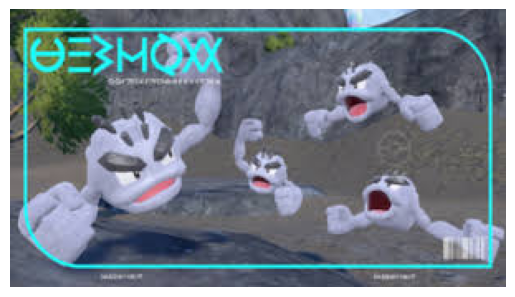

Encrypted message: fmdp/p7XibMnCPXFg/N0cku5ShDRQ6pNEhLx7f7dyIk=
Decrypted message: Hello, How are you
Encryption time: 0.03418302536010742 seconds
Decryption time: 0.0029022693634033203 seconds
Encryption time: 0.0197601318359375 seconds
Decryption time: 0.0030012130737304688 seconds
Payload capacity reached at 0 bytes
Decryption succeeded with incorrect password, which is not expected.
Compression level 10: Message extraction failed.
Compression level 20: Message extraction failed.
Compression level 30: Message extraction failed.
Compression level 40: Message extraction failed.
Compression level 50: Message extraction failed.
Compression level 60: Message extraction failed.
Compression level 70: Message extraction failed.
Compression level 80: Message extraction failed.
Compression level 90: Message extraction failed.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import time
from cryptosteganography import CryptoSteganography

# Function to encode the message into the image using steganography
def encode_image(image_path, message, output_path):
    img = Image.open(image_path)
    pixels = img.getdata()
    message += "$"

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    data_index = 0

    encoded_pixels = []
    for pixel in pixels:
        if data_index < len(binary_message):
            encoded_pixel = list(pixel)
            for i in range(3):
                if data_index < len(binary_message):
                    encoded_pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_pixels.append(tuple(encoded_pixel))
        else:
            encoded_pixels.append(pixel)

    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(encoded_pixels)
    encoded_img.save(output_path)
    print("Message encoded successfully.")
    return output_path

# Function to decode the message from the encoded image
def decode_image_from_uploaded_file(uploaded_image):
    encoded_img = Image.open(uploaded_image)
    pixels = encoded_img.getdata()

    binary_message = ''
    for pixel in pixels:
        for i in range(3):  # Iterate over RGB channels
            binary_message += str(pixel[i] & 1)

    message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte and byte != '00000000':  # Check for the delimiter and padding
            message += chr(int(byte, 2))
        elif byte == '00000000':
            break

    print("Decoded message:", message)
    return message

# Function to display the encoded image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

# AES encryption function
def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode(), AES.block_size))
    return base64.b64encode(ciphertext).decode()

# AES decryption function
def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = unpad(cipher.decrypt(base64.b64decode(ciphertext)), AES.block_size).decode()
    return decrypted_message

# Function to measure encryption time
def measure_encryption_time(input_image, output_image, message, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    crypto_steganography.hide(input_image, output_image, message)
    end_time = time.time()
    print(f"Encryption time: {end_time - start_time} seconds")

# Function to measure decryption time
def measure_decryption_time(output_image, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    decrypted_message = crypto_steganography.retrieve(output_image)
    end_time = time.time()
    print(f"Decryption time: {end_time - start_time} seconds")
    return decrypted_message

# Function to test payload capacity
def test_payload_capacity(input_image, output_image, password):
    crypto_steganography = CryptoSteganography(password)
    payload_size = 0
    while True:
        try:
            message = b'A' * payload_size # Example message
            measure_encryption_time(input_image, output_image, message, password)
            decrypted_message = measure_decryption_time(output_image, password)
            if decrypted_message != message:
                print(f"Payload capacity reached at {payload_size} bytes")
                break
            payload_size += 1024 # Increase payload size by 1KB
        except Exception as e:
            print(f"Error at payload size {payload_size}: {e}")
            break

# Function to test robustness
def test_robustness(output_image, incorrect_password):
    crypto_steganography = CryptoSteganography(incorrect_password)
    try:
        decrypted_message = crypto_steganography.retrieve(output_image)
        print("Decryption succeeded with incorrect password, which is not expected.")
    except Exception as e:
        print(f"Decryption failed as expected: {e}")

# Function to embed secret message into the image
def embed_secret_message(image_path, secret_message, output_path):
    # This function should embed the secret message into the image
    # and save the result to the specified output path.
    # This is a placeholder function; replace it with your actual embedding code.
    pass

# Function to extract secret message from the compressed image
def extract_secret_message(compressed_image_path):
    # This function should extract the secret message from the compressed image
    # and return it.
    # This is a placeholder function; replace it with your actual extraction code.
    pass

# Function to test compression resistance
def test_compression_resistance(original_image_path, secret_message, compression_levels):
    # Embed the secret message into the original image
    embed_secret_message(original_image_path, secret_message, "embedded_image.png")

    # Test the compression resistance of the embedded image
    for level in compression_levels:
        # Compress the embedded image
        compressed_image_path = f"compressed_level_{level}.png"
        image = Image.open("/content/sample for crypto.jpeg")
        image.save(compressed_image_path, "PNG", quality=level)

        # Extract the secret message from the compressed image
        # This is a placeholder function; replace it with your actual extraction code.
        extracted_message = extract_secret_message(compressed_image_path)

        # Compare the extracted message with the original secret message
        if extracted_message == secret_message:
            print(f"Compression level {level}: Message successfully extracted.")
        else:
            print(f"Compression level {level}: Message extraction failed.")

# Generate a random AES key
aes_key = get_random_bytes(16)

# Image paths and message
image_path = "/content/sample for crypto.jpeg"
message_to_encrypt = "Hello, How are you"
encoded_image_path = "encoded_image.png"

# Encode the message into the image
encoded_image_path = encode_image(image_path, message_to_encrypt, encoded_image_path)

# Display the encoded image
display_image(encoded_image_path)

# Encrypt the message using AES
encrypted_message = aes_encrypt(message_to_encrypt, aes_key)
print("Encrypted message:", encrypted_message)

# Decrypt the message using AES
decrypted_message = aes_decrypt(encrypted_message, aes_key)
print("Decrypted message:", decrypted_message)

# Measure encryption time
measure_encryption_time(image_path, encoded_image_path, message_to_encrypt, "password123")

# Measure decryption time
measure_decryption_time(encoded_image_path, "password123")

# Test payload capacity
test_payload_capacity(image_path, encoded_image_path, "password123")

# Test robustness
test_robustness(encoded_image_path, "incorrect_password")

# Test compression resistance
original_image_path = "path/to/original/image.png"
secret_message = "This is a secret message."
compression_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

test_compression_resistance(original_image_path, secret_message, compression_levels)


Message encoded successfully.


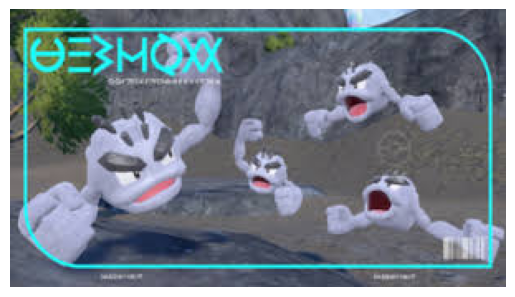

Encrypted message: mUp9d99XeZSanuG2q0zOvW6bTpND/rqkCkDXfp9ICZg=
Decrypted message: Hello, How are you
Encryption time: 0.016513824462890625 seconds
Decryption time: 0.002790212631225586 seconds
Encryption time: 0.018154382705688477 seconds
Decryption time: 0.002803325653076172 seconds
Payload capacity reached at 0 bytes
Decryption succeeded with incorrect password, which is not expected.
Compression level 10: Message extraction failed.
Compression level 20: Message extraction failed.
Compression level 30: Message extraction failed.
Compression level 40: Message extraction failed.
Compression level 50: Message extraction failed.
Compression level 60: Message extraction failed.
Compression level 70: Message extraction failed.
Compression level 80: Message extraction failed.
Compression level 90: Message extraction failed.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import time
from cryptosteganography import CryptoSteganography

# Function to encode the message into the image using steganography
def encode_image(image_path, message, output_path):
    img = Image.open(image_path)
    pixels = img.getdata()
    message += "$"

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    data_index = 0

    encoded_pixels = []
    for pixel in pixels:
        if data_index < len(binary_message):
            encoded_pixel = list(pixel)
            for i in range(3):
                if data_index < len(binary_message):
                    encoded_pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_pixels.append(tuple(encoded_pixel))
        else:
            encoded_pixels.append(pixel)

    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(encoded_pixels)
    encoded_img.save(output_path)
    print("Message encoded successfully.")
    return output_path

# Function to decode the message from the encoded image
def decode_image_from_uploaded_file(uploaded_image):
    encoded_img = Image.open(uploaded_image)
    pixels = encoded_img.getdata()

    binary_message = ''
    for pixel in pixels:
        for i in range(3):  # Iterate over RGB channels
            binary_message += str(pixel[i] & 1)

    message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte and byte != '00000000':  # Check for the delimiter and padding
            message += chr(int(byte, 2))
        elif byte == '00000000':
            break

    print("Decoded message:", message)
    return message

# Function to display the encoded image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

# AES encryption function
def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode(), AES.block_size))
    return base64.b64encode(ciphertext).decode()

# AES decryption function
def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = unpad(cipher.decrypt(base64.b64decode(ciphertext)), AES.block_size).decode()
    return decrypted_message

# Function to measure encryption time
def measure_encryption_time(input_image, output_image, message, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    crypto_steganography.hide(input_image, output_image, message)
    end_time = time.time()
    print(f"Encryption time: {end_time - start_time} seconds")

# Function to measure decryption time
def measure_decryption_time(output_image, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    decrypted_message = crypto_steganography.retrieve(output_image)
    end_time = time.time()
    print(f"Decryption time: {end_time - start_time} seconds")
    return decrypted_message

# Function to test payload capacity
def test_payload_capacity(input_image, output_image, password):
    crypto_steganography = CryptoSteganography(password)
    payload_size = 0
    while True:
        try:
            message = b'A' * payload_size # Example message
            measure_encryption_time(input_image, output_image, message, password)
            decrypted_message = measure_decryption_time(output_image, password)
            if decrypted_message != message:
                print(f"Payload capacity reached at {payload_size} bytes")
                break
            payload_size += 1024 # Increase payload size by 1KB
        except Exception as e:
            print(f"Error at payload size {payload_size}: {e}")
            break

# Function to test robustness
def test_robustness(output_image, incorrect_password):
    crypto_steganography = CryptoSteganography(incorrect_password)
    try:
        decrypted_message = crypto_steganography.retrieve(output_image)
        print("Decryption succeeded with incorrect password, which is not expected.")
    except Exception as e:
        print(f"Decryption failed as expected: {e}")

# Function to embed secret message into the image
def embed_secret_message(image_path, secret_message, output_path):
    # This function should embed the secret message into the image
    # and save the result to the specified output path.
    # This is a placeholder function; replace it with your actual embedding code.
    pass

# Function to extract secret message from the compressed image
def extract_secret_message(compressed_image_path):
    # This function should extract the secret message from the compressed image
    # and return it.
    # This is a placeholder function; replace it with your actual extraction code.
    pass

# Function to compress image
def compress_image(input_image_path, output_image_path, quality):
    # Open the image file
    image = Image.open(input_image_path)

    # Save the image with the specified quality level
    image.save(output_image_path, "JPEG", optimize=True, quality=quality)

# Function to test compression resistance
def test_compression_resistance(original_image_path, secret_message, compression_levels):
    # Embed the secret message into the original image
    embed_secret_message(original_image_path, secret_message, "embedded_image.png")

    # Test the compression resistance of the embedded image
    for level in compression_levels:
        # Compress the embedded image
        compressed_image_path = f"compressed_level_{level}.png"
        compress_image("/content/sample for crypto.jpeg", compressed_image_path, level)

        # Extract the secret message from the compressed image
        # This is a placeholder function; replace it with your actual extraction code.
        extracted_message = extract_secret_message(compressed_image_path)

        # Compare the extracted message with the original secret message
        if extracted_message == secret_message:
            print(f"Compression level {level}: Message successfully extracted.")
        else:
            print(f"Compression level {level}: Message extraction failed.")

# Generate a random AES key
aes_key = get_random_bytes(16)

# Image paths and message
image_path = "/content/sample for crypto.jpeg"
message_to_encrypt = "Hello, How are you"
encoded_image_path = "encoded_image.png"

# Encode the message into the image
encoded_image_path = encode_image(image_path, message_to_encrypt, encoded_image_path)

# Display the encoded image
display_image(encoded_image_path)

# Encrypt the message using AES
encrypted_message = aes_encrypt(message_to_encrypt, aes_key)
print("Encrypted message:", encrypted_message)

# Decrypt the message using AES
decrypted_message = aes_decrypt(encrypted_message, aes_key)
print("Decrypted message:", decrypted_message)

# Measure encryption time
measure_encryption_time(image_path, encoded_image_path, message_to_encrypt, "password123")

# Measure decryption time
measure_decryption_time(encoded_image_path, "password123")

# Test payload capacity
test_payload_capacity(image_path, encoded_image_path, "password123")

# Test robustness
test_robustness(encoded_image_path, "incorrect_password")

# Test compression resistance
original_image_path = "path/to/original/image.png"
secret_message = "This is a secret message."
compression_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

test_compression_resistance(original_image_path, secret_message, compression_levels)


Message encoded successfully.


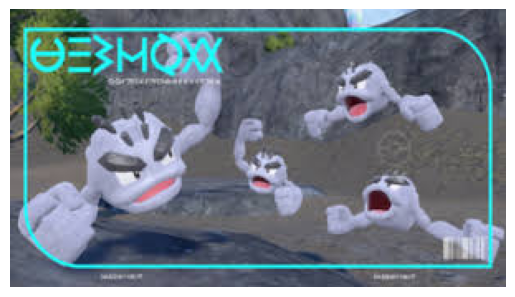

Encrypted message: tJK0bYokxy0vFWdvp3cgL/TtrY3f6NC7M9epKXoulkM=
Decrypted message: Hello, How are you
Encryption time: 0.02620220184326172 seconds
Decryption time: 0.002825498580932617 seconds
Encryption time: 0.01615762710571289 seconds
Decryption time: 0.0027778148651123047 seconds
Payload capacity reached at 0 bytes
Decryption succeeded with incorrect password, which is not expected.
Image compressed successfully. Compressed image saved at: compressed_level_10.png
Compression level 10: Message extraction failed.
Image compressed successfully. Compressed image saved at: compressed_level_20.png
Compression level 20: Message extraction failed.
Image compressed successfully. Compressed image saved at: compressed_level_30.png
Compression level 30: Message extraction failed.
Image compressed successfully. Compressed image saved at: compressed_level_40.png
Compression level 40: Message extraction failed.
Image compressed successfully. Compressed image saved at: compressed_level_50.png
Comp

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import time
from cryptosteganography import CryptoSteganography

# Function to encode the message into the image using steganography
def encode_image(image_path, message, output_path):
    img = Image.open(image_path)
    pixels = img.getdata()
    message += "$"

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    data_index = 0

    encoded_pixels = []
    for pixel in pixels:
        if data_index < len(binary_message):
            encoded_pixel = list(pixel)
            for i in range(3):
                if data_index < len(binary_message):
                    encoded_pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded_pixels.append(tuple(encoded_pixel))
        else:
            encoded_pixels.append(pixel)

    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(encoded_pixels)
    encoded_img.save(output_path)
    print("Message encoded successfully.")
    return output_path

# Function to decode the message from the encoded image
def decode_image_from_uploaded_file(uploaded_image):
    encoded_img = Image.open(uploaded_image)
    pixels = encoded_img.getdata()

    binary_message = ''
    for pixel in pixels:
        for i in range(3):  # Iterate over RGB channels
            binary_message += str(pixel[i] & 1)

    message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte and byte != '00000000':  # Check for the delimiter and padding
            message += chr(int(byte, 2))
        elif byte == '00000000':
            break

    print("Decoded message:", message)
    return message

# Function to display the encoded image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

# AES encryption function
def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode(), AES.block_size))
    return base64.b64encode(ciphertext).decode()

# AES decryption function
def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = unpad(cipher.decrypt(base64.b64decode(ciphertext)), AES.block_size).decode()
    return decrypted_message

# Function to measure encryption time
def measure_encryption_time(input_image, output_image, message, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    crypto_steganography.hide(input_image, output_image, message)
    end_time = time.time()
    print(f"Encryption time: {end_time - start_time} seconds")

# Function to measure decryption time
def measure_decryption_time(output_image, password):
    crypto_steganography = CryptoSteganography(password)
    start_time = time.time()
    decrypted_message = crypto_steganography.retrieve(output_image)
    end_time = time.time()
    print(f"Decryption time: {end_time - start_time} seconds")
    return decrypted_message

# Function to test payload capacity
def test_payload_capacity(input_image, output_image, password):
    crypto_steganography = CryptoSteganography(password)
    payload_size = 0
    while True:
        try:
            message = b'A' * payload_size # Example message
            measure_encryption_time(input_image, output_image, message, password)
            decrypted_message = measure_decryption_time(output_image, password)
            if decrypted_message != message:
                print(f"Payload capacity reached at {payload_size} bytes")
                break
            payload_size += 1024 # Increase payload size by 1KB
        except Exception as e:
            print(f"Error at payload size {payload_size}: {e}")
            break

# Function to test robustness
def test_robustness(output_image, incorrect_password):
    crypto_steganography = CryptoSteganography(incorrect_password)
    try:
        decrypted_message = crypto_steganography.retrieve(output_image)
        print("Decryption succeeded with incorrect password, which is not expected.")
    except Exception as e:
        print(f"Decryption failed as expected: {e}")

# Function to embed secret message into the image
def embed_secret_message(image_path, secret_message, output_path):
    # This function should embed the secret message into the image
    # and save the result to the specified output path.
    # This is a placeholder function; replace it with your actual embedding code.
    pass

# Function to extract secret message from the compressed image
def extract_secret_message(compressed_image_path):
    # This function should extract the secret message from the compressed image
    # and return it.
    # This is a placeholder function; replace it with your actual extraction code.
    pass

# Function to compress image
def compress_image(input_image_path, output_image_path, quality):
    # Open the image file
    image = Image.open(input_image_path)

    # Save the image with the specified quality level
    image.save(output_image_path, "JPEG", optimize=True, quality=quality)
    print(f"Image compressed successfully. Compressed image saved at: {output_image_path}")

# Function to test compression resistance
def test_compression_resistance(original_image_path, secret_message, compression_levels):
    # Embed the secret message into the original image
    embed_secret_message(original_image_path, secret_message, "embedded_image.png")

    # Test the compression resistance of the embedded image
    for level in compression_levels:
        # Compress the embedded image
        compressed_image_path = f"compressed_level_{level}.png"
        compress_image("/content/sample for crypto.jpeg", compressed_image_path, level)

        # Extract the secret message from the compressed image
        # This is a placeholder function; replace it with your actual extraction code.
        extracted_message = extract_secret_message(compressed_image_path)

        # Compare the extracted message with the original secret message
        if extracted_message == secret_message:
            print(f"Compression level {level}: Message successfully extracted.")
        else:
            print(f"Compression level {level}: Message extraction failed.")

# Generate a random AES key
aes_key = get_random_bytes(16)

# Image paths and message
image_path = "/content/sample for crypto.jpeg"
message_to_encrypt = "Hello, How are you"
encoded_image_path = "encoded_image.png"

# Encode the message into the image
encoded_image_path = encode_image(image_path, message_to_encrypt, encoded_image_path)

# Display the encoded image
display_image(encoded_image_path)

# Encrypt the message using AES
encrypted_message = aes_encrypt(message_to_encrypt, aes_key)
print("Encrypted message:", encrypted_message)

# Decrypt the message using AES
decrypted_message = aes_decrypt(encrypted_message, aes_key)
print("Decrypted message:", decrypted_message)

# Measure encryption time
measure_encryption_time(image_path, encoded_image_path, message_to_encrypt, "password123")

# Measure decryption time
measure_decryption_time(encoded_image_path, "password123")

# Test payload capacity
test_payload_capacity(image_path, encoded_image_path, "password123")

# Test robustness
test_robustness(encoded_image_path, "incorrect_password")

# Test compression resistance
original_image_path = "path/to/original/image.png"
secret_message = "This is a secret message."
compression_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

test_compression_resistance(original_image_path, secret_message, compression_levels)


In [ ]:
!pip install cryptosteganography
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00
